In [1]:
pip install pyro-ppl

  Obtaining dependency information for pyro-ppl from https://files.pythonhosted.org/packages/f2/93/59bced321ede6eeb60061f156df8aae3f4832127fe97f4e86c567ad3b9cc/pyro_ppl-1.8.6-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 19.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/58/f7/a966b800b49cb5379e348bf0717df481051714a99ece15289718562f6952/yfinance-0.2.35-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 6.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=290465 sha256=c1fa8504cebbee628d828eabae2d1c216f489cea3b93efb135b938d97f76f3dd
  Stored in directory: /root/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [3]:
#imports 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython import display
import os
from PIL import Image
from torch.utils.data.dataset import Dataset
import scipy
import torch.nn.functional as nnf
from torch.optim import SGD 

In [19]:
import pyro
from pyro.distributions import Normal, Categorical
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
import yfinance as yf
import matplotlib.pyplot as plt

In [13]:
#data import and processing 

crude = yf.Ticker("CL=F")
crude.info






{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 70.77,
 'open': 70.91,
 'dayLow': 70.61,
 'dayHigh': 71.04,
 'regularMarketPreviousClose': 70.77,
 'regularMarketOpen': 70.91,
 'regularMarketDayLow': 70.61,
 'regularMarketDayHigh': 71.04,
 'volume': 7015,
 'regularMarketVolume': 7015,
 'averageVolume': 298705,
 'averageVolume10days': 276864,
 'averageDailyVolume10Day': 276864,
 'bid': 70.98,
 'ask': 70.99,
 'bidSize': 900,
 'askSize': 1100,
 'expireDate': 1705881600,
 'openInterest': 230314,
 'fiftyTwoWeekLow': 63.64,
 'fiftyTwoWeekHigh': 95.03,
 'fiftyDayAverage': 75.2978,
 'twoHundredDayAverage': 77.80875,
 'currency': 'USD',
 'exchange': 'NYM',
 'quoteType': 'FUTURE',
 'symbol': 'CLG24.NYM',
 'underlyingSymbol': 'CL=F',
 'shortName': 'Crude Oil Feb 24',
 'firstTradeDateEpochUtc': 967003200,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EST',
 'uuid': '2e63caf7-96c3-3195-95bd-9fdc98ac5dd3',
 'gmtOffSetMilliseconds': -18000000,
 'trailingPegRatio': None}

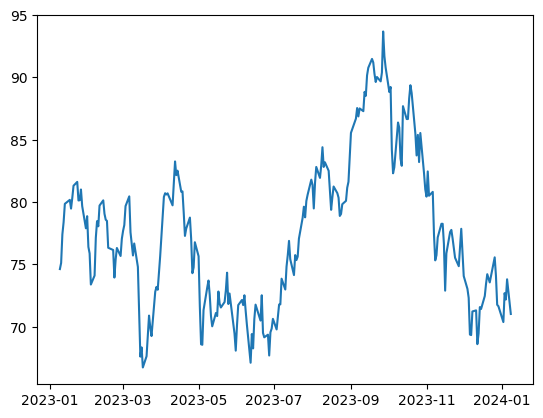

In [23]:
hist = crude.history(period="12mo")
plt.plot(hist.loc[:,"Close"])


In [22]:
hist.shape

(20, 7)